## Secant Method
The Secant Method can be used to find a root, $x_{∗}$, of a function $f(x)$ so that $f(x_{∗}) = 0$. This method is an adaptation of Newton’s method, where the derivative is estimated using the approximation:

$$
f′(x_k) \simeq \frac{f(x_k) − f(x_{k−1})}{x_k − x_{k−1}}.
$$

In the Secant Method a sequence of successive estimates for $x_{∗}$, labelled $\{x_k\}_{k\ge1}$, are calculated using the formula

$$
x_{k+1} =x_{k} − \frac{x_k −x_{k−1}}{f(x_k) - f(x_{k-1})}f(x_k).
$$

Geometrically $x_{k+1}$ is obtained from $x_k$ and $x_{k−1}$ by intersecting the straight line through $\big( x_k, f(x_k)\big)$ and $\big( x_{k+1}, f(x_{k+1}) \big)$ with the $x$-axis. Since each calculation of the new estimate, $x_{k+1}$, requires the values of the previous two estimates, $x_k$ and $x_{k−1}$, we must specify $x_0$ and $x_1$ initially, choosing values that are close to the root we seek. Ideally, we should choose $x_0$ and $x_1$ in a similar way to the initial endpoints of an interval for the bisection method, such that $f(x) = 0$ precisely once in the interval $(x_0,x_1)$, though this is not necessary for the secant method to work. 


**(a) [5 Marks]**

Complete the function 'secant_method' below  which takes as input a function $f$, two real numbers $x_0$ and $x_1$, a positive real number $tol$ and a positive integer $k_{max}$. This function should implement the Secant Method to find a root of a function $f$ between two points $x_0$ and $x_1$. Successive estimates should be calculated until the relative error $e_k$ is less than $tol$ or $k>k_{max}$. 
Recall that 
$$
e_k = \left| \frac{x_k - x_{k-1}}{x_k} \right|.
$$
- If no root is found an ArithmeticError should be raised.
- If $tol\le0$ then a ValueError sould be raised.
- If $k_{max}\le 0$ then a ValueError should be raised.
- If $x_0 == x_1$ then a ValueError should be raised. 
- Otherwise the function should return a tuple $(x_N,e_N,N)$ consisting of the final approximation, $x_{N}$, the estimated relative error, $e_N$ and the index of the approximation, $N$.


In [2]:
def secant_method(f,x0,x1,tol,kmax):

    en=np.abs((x0-x1)/x1);
    
    
    if x0==x1:
            raise ValueError

    elif f(x0)*f(x1) >= 0:
            raise ArithmeticError
    elif tol<=0:
            raise ValueError
    elif kmax<0:
            raise ValueError
            
    an = x0
    bn = x1
    for n in range(1,kmax+1):
        mn = an - f(an)*(bn - an)/(f(bn) - f(an))
        fmn = f(mn)
        if f(an)*fmn < 0:
            an = an
            bn = mn
        
        elif f(bn)*fmn < 0:
            an = mn
            bn = bn
        elif(en<tol or n>kmax):
            return tuple([mn,en,n]);
        elif fmn == 0:
            return tuple([mn,en,n]);
        else:
            return None
    xn=an - f(an)*(bn - an)/(f(bn) - f(an))    
    return tuple([xn,en,n])

In [3]:
f=lambda h: 136220*h**2 +6192*h + 88

secant_method(f,1,10,1e-10,2000)

NameError: name 'np' is not defined

**b)**

Modify the algorithm above so that it instead returns a list of tuples of the form 
$(x_k,f(x_k))$, where $x_k$ are the successive approximations of $x_{∗}$. 


In [4]:
def secant_method_list(f,x0,x1,tol,kmax):

    en=np.abs((x0-x1)/x1);
    L=[]
    
    if x0==x1:
            raise ValueError

    elif f(x0)*f(x1) >= 0:
            raise ArithmeticError
    elif tol<=0:
            raise ValueError
    elif kmax<0:
            raise ValueError
            
    an = x0
    bn = x1
    for n in range(1,kmax+1):
        mn = an - f(an)*(bn - an)/(f(bn) - f(an))
        fmn = f(mn)
        if f(an)*fmn < 0:
            an = an
            bn = mn
        
            L.append(tuple([bn,f(bn)]))
        
        elif f(bn)*fmn < 0:
            an = mn
            bn = bn
            
            L.append(tuple([an,f(an)]))
            
        elif(en<tol or n>kmax):
            return L;
        elif fmn == 0:
            return L;
        else:
            return None
    xn=an - f(an)*(bn - an)/(f(bn) - f(an))    
    return L



**c) [5 Marks]**

Consider the rational function
$$
f(x) = \frac{x^3-x^2+2x+1}{3x^2+2}
$$

Use the function from b) with initial approximations $x_0=-2$ and $x_1=1$ to compute a list of approximations, $x_0,x_1,\ldots,x_N$ to the unique real zero of $f$ (which lies between $x_0$ and $x_1$). 

Illustrate the Secant Method by plotting 

- a) The curve of $f$.
- b) The $x$-axis.
- c) The five points $z_i=(x_i,f(x_i))$ for $0\le i\le 4$ on the curve,
- d) The four straight lines (secants) between $z_0$ and $z_1$, $z_1$ and $z_2$, $z_2$ and $z_3$, and $z_3$ and $z_4$.

The plot should have size (20,10) and be limited in both $x$ and $y$-directions in such a way that the relevant parts of the graphs and intersections are clearly visible. 

Note: The convergence for these particular starting values is slow in the beginning so the first few points will not clearly illustrate the actual convergence. 

Insert the plotting code in the cell below and execute the plot. 


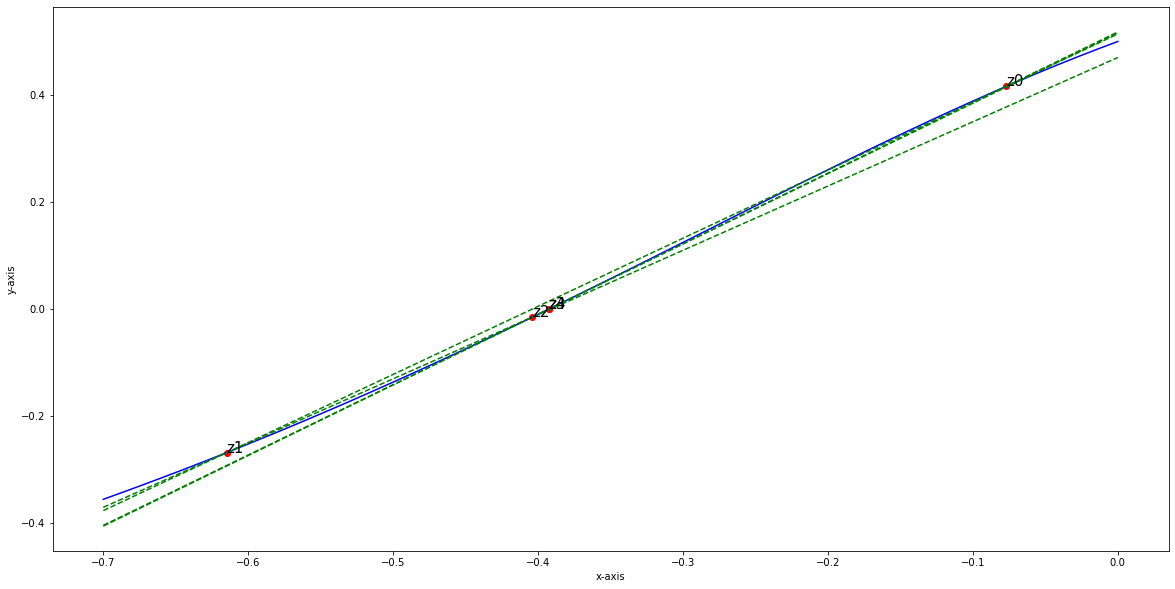

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data=secant_method_list((lambda x:(x**3-x**2+2*x+1)/(3*x**2+2)), -2,1,1e-12,100)
ya=[]
xa=[]
for x in range(0,5):
    ya.append(data[x][1])

    
for x in range(0,5):
    xa.append(data[x][0])

text=['z0','z1','z2','z3','z4']
xx=np.linspace(-0.70,0.)
fx=(xx**3-xx**2+2*xx+1)/(3*xx**2+2)


fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
    
ax.plot(xx,fx,color='b')
ax.scatter(xa,ya,color='r')
ax.set_ylabel('y-axis')
ax.set_xlabel('x-axis')

for i, txt in enumerate(text):
    ax.annotate(txt, (xa[i], ya[i]),fontsize=15)
    
    
##### secant lines in green


def slopes(p11,p22):
    msec=(ya[p22]-ya[p11])/(xa[p22]-xa[p11])
    c=ya[p11]-msec
    secline=msec*(xx-xa[p11])+ya[p11]
    ax.plot(xx,secline,color='g',ls='--')

slopes(0,1)
slopes(1,2)
slopes(2,3)
slopes(3,4)

**(d) [5 Marks]** 

Use the Secant Method (with the algorithm from above) together with plotting to find approximations of all zeros of the function 

$$
f(x) = 2/5 + x\sin(3/x).
$$

Insert new code and text cells below as needed. Include your working and an answer in a Markdown formatted cell at the end, before the next question.

zero 1= (0.5487955261107639, 0.16666666666666663, 100)
zero 2= (0.8219543093181724, 0.25, 100)
zero 3= (-0.5487955261107639, 0.19999999999999996, 100)
zero 4= (-0.8219543093181724, 0.3333333333333333, 100)


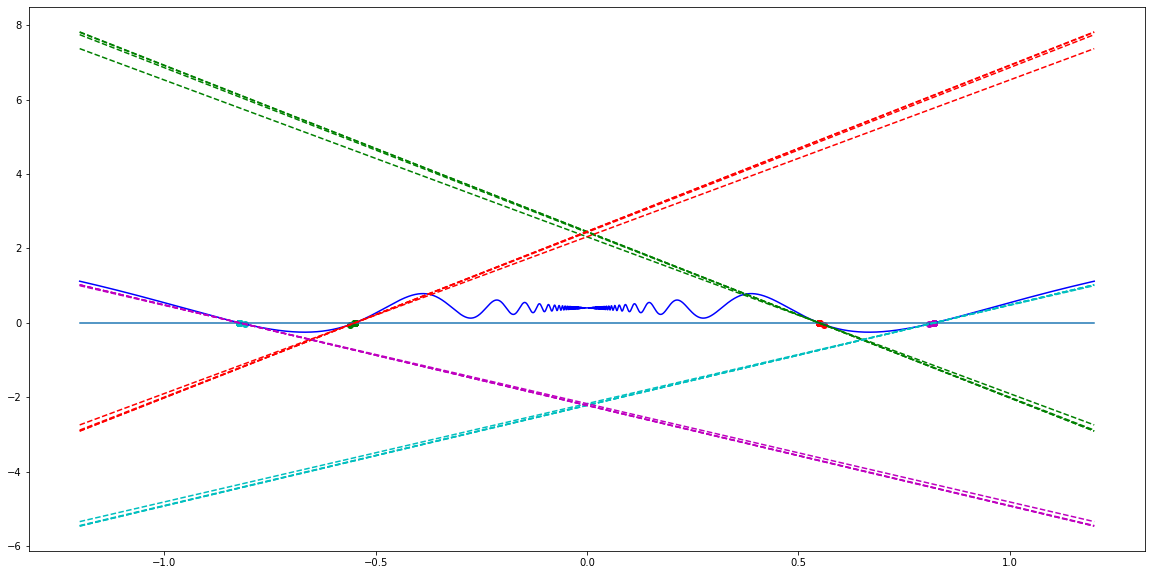

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#function graph

xx=np.linspace(-1.2,1.2,10000)
fx=(2/5) + xx*np.sin(3/xx)
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(xx,fx,color='b')  



##### zeroes
# firstly, plot a straight line across y=0 on the graph that will show how many zeroes this function has
# according to the graph, we can see that there are 4 points in the function line intersecting with y=0
# thus, there are a total of 4 zeroes.
sy=[0,0]
sx=[-1.2,1.2]
ax.plot(sx,sy)



# zero 1
#from the graph, we can approximate that the zero lies between 0.5 and 0.6
data=secant_method_list((lambda x:(2/5) + x*np.sin(3/x)), 0.5,0.6,1e-12,100)
yb=[]
xb=[]
for x in range(0,len(data)):
    yb.append(data[x][1])

    
for x in range(0,len(data)):
    xb.append(data[x][0])
    
    
ax.scatter(xb,yb,color='r')

#secline zero 1 (green)

def slopes(p11,p22):
    msec=(yb[p22]-yb[p11])/(xb[p22]-xb[p11])
    c=yb[p11]-msec
    secline=msec*(xx-xb[p11])+yb[p11]
    ax.plot(xx,secline,color='g',ls='--')
    
slopes(0,1)
slopes(1,2)
slopes(2,3)
slopes(3,4)




#zero 2
#from the graph, we can approximate that another zero lies between 0.75 and 1
data1=secant_method_list((lambda x:(2/5) + x*np.sin(3/x)), 0.75,1,1e-12,100)
yb1=[]
xb1=[]
for x in range(0,len(data1)):
    yb1.append(data1[x][1])

    
for x in range(0,len(data1)):
    xb1.append(data1[x][0])
    
ax.scatter(xb1,yb1,color='m')

#secline zero 2 (cyan)

def slopes1(p11,p22):
    msec1=(yb1[p22]-yb1[p11])/(xb1[p22]-xb1[p11])
    c1=yb1[p11]-msec1
    secline1=msec1*(xx-xb1[p11])+yb1[p11]
    ax.plot(xx,secline1,color='c',ls='--')
    
slopes1(0,1)
slopes1(1,2)
slopes1(2,3)
slopes1(3,4)



###### Note that the function is symmetrical. Since the function has 4 zeroes, we know that zeroes 3&4
###### are the zeroes 1 & 2 *(-1). Or, we can use the secant method again to prove this.

#zero 3
#from the graph, we can approximate that another zero lies between -0.5 and -0.6
data2=secant_method_list((lambda x:(2/5) + x*np.sin(3/x)), -0.6,-0.5,1e-12,100)
yb2=[]
xb2=[]
for x in range(0,len(data2)):
    yb2.append(data2[x][1])

    
for x in range(0,len(data2)):
    xb2.append(data2[x][0])
    
ax.scatter(xb2,yb2,color='g')

#secline zero 3 (red)

def slopes2(p11,p22):
    msec2=(yb2[p22]-yb2[p11])/(xb2[p22]-xb2[p11])
    c2=yb2[p11]-msec2
    secline2=msec2*(xx-xb2[p11])+yb2[p11]
    ax.plot(xx,secline2,color='r',ls='--')
    
slopes2(0,1)
slopes2(1,2)
slopes2(2,3)
slopes2(3,4)




#zero 4
#from the graph, we can approximate that the last zero lies between -0.75 and -0.90
data3=secant_method_list((lambda x:(2/5) + x*np.sin(3/x)), -0.75,-1,1e-12,100)
yb3=[]
xb3=[]
for x in range(0,len(data3)):
    yb3.append(data3[x][1])

    
for x in range(0,len(data3)):
    xb3.append(data3[x][0])
    
ax.scatter(xb3,yb3,color='c')

#secline zero 4 (magenta)

def slopes3(p11,p22):
    msec3=(yb3[p22]-yb3[p11])/(xb3[p22]-xb3[p11])
    c3=yb3[p11]-msec3
    secline3=msec3*(xx-xb3[p11])+yb3[p11]
    ax.plot(xx,secline3,color='m',ls='--')
    
slopes3(0,1)
slopes3(1,2)
slopes3(2,3)
slopes3(3,4)


#zero values
zero1 = secant_method(lambda x:(2/5) + x*np.sin(3/x),0.5,0.6,1e-12,100)
zero2 =secant_method(lambda x:(2/5) + x*np.sin(3/x),0.75,1,1e-12,100)
zero3 =secant_method(lambda x:(2/5) + x*np.sin(3/x),-0.6,-0.5,1e-12,100)
zero4 =secant_method(lambda x:(2/5) + x*np.sin(3/x),-1,-0.75,1e-12,100)
print('zero 1=',zero1)
print('zero 2=',zero2)
print('zero 3=',zero3)
print('zero 4=',zero4)

## Answer to Question 1 (d)

from the calculations and plotting done above, we can conclude that the four zeroes of this function with  $(x_N,e_N,N)$ consisting of the final approximation, $x_{N}$, the estimated relative error, $e_N$ and the index of the approximation, $N$  are:

zero 1= (0.5487955261107639, 0.16666666666666663, 100)

zero 2= (0.8219543093181724, 0.25, 100)

zero 3= (-0.5487955261107639, 0.19999999999999996, 100)

zero 4= (-0.8219543093181724, 0.3333333333333333, 100)

## Question 2 [CAL]


**(a) [5 Marks]** Use the matplotlib package to plot the level curves of the function 
$$f: D \rightarrow \mathbb{R}$$ given by

$$
f(x,y) = xye^{−2x^2−y^4},
$$

where the domain $D \subseteq \mathbb{R}^2$, is 
$$
D =\{(x,y)\;|\; x,y \in [−1,1]\}.
$$

Insert your code in the cell below and execute it to draw the plot.

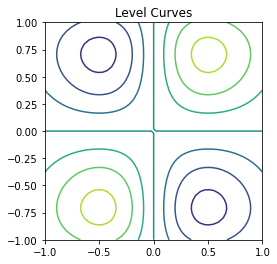

In [10]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = X*Y*np.exp(-2*X**2-Y**4)

fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal') 
ax.contour(X,Y,Z)
ax.set_title('Level Curves')
plt.show()

**(b) [5 Marks]** 

Use matplotlib to plot the surface $z = f(x,y)$ where $f$ is given as in (a).
Make sure that the axes and ticks of the plot look nice. In particular, make sure that there are only 5 ticks per axis shown. 
Insert your code in the cell below and execute it to draw the plot.

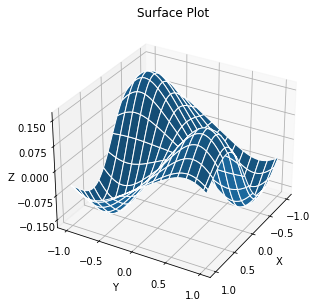

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = X*Y*np.exp(-2*X**2-Y**4)

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, rcount=20,ccount=20, edgecolors='w')
ax.set_title("Surface Plot")
ax.set_xlabel('X')
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-0.15,-0.075,0,0.075,0.15])
ax.view_init(30,30)


**(c) [5 Marks]** Use further plots around the maxima and minima visible from the plot in 2(a) to estimate the locations and values of the maxima and minima of $f(x,y)$ on $D$ to as much precision as you are able to.
Create cells below to show your plots and calculations and clearly state your estimated answer in a Markdown-formatted cell before the beginning of next question.


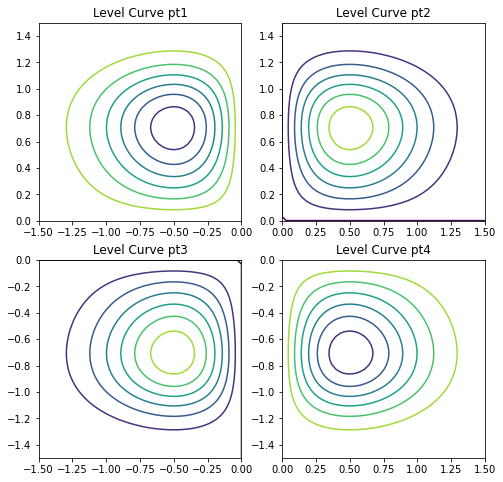

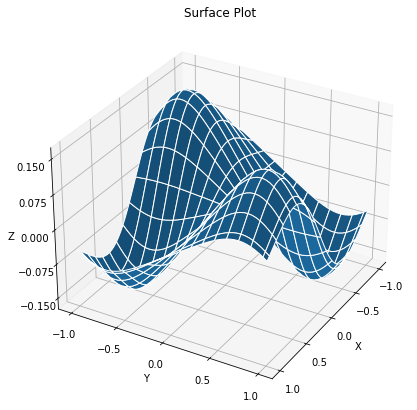

maximum at (x,y,z): (-0.5102040816326531, -0.7142857142857143, 0.16690319177719284)
maximum value: 0.16690319177719284
minimum at(x,y,z): (0.510204081632653, -0.7142857142857143, -0.16690319177719282)
minimum value: -0.16690319177719282


In [12]:
import numpy as np
import matplotlib.pyplot as plt

################# Level curves and graph
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(221) 
ax2 = fig.add_subplot(222) 
ax3 = fig.add_subplot(223) 
ax4 = fig.add_subplot(224) 

x = np.linspace(-1.5,0)
y = np.linspace(0,1.5)
X,Y = np.meshgrid(x,y)
Z = X*Y*np.exp(-2*X**2-Y**4)



ax1.contour(X,Y,Z)
ax1.set_title('Level Curve pt1')



x1 = np.linspace(0,1.5)
y1 = np.linspace(0,1.5)
X1,Y1 = np.meshgrid(x1,y1)
Z1 = X1*Y1*np.exp(-2*X1**2-Y1**4)


ax2.contour(X1,Y1,Z1)
ax2.set_title('Level Curve pt2')



x2 = np.linspace(-1.5,0)
y2 = np.linspace(-1.5,0)
X2,Y2 = np.meshgrid(x2,y2)
Z2 = X2*Y2*np.exp(-2*X2**2-Y2**4)


ax3.contour(X2,Y2,Z2)
ax3.set_title('Level Curve pt3')


x3 = np.linspace(0,1.5)
y3 = np.linspace(0,-1.5)
X3,Y3 = np.meshgrid(x3,y3)
Z3 = X3*Y3*np.exp(-2*X3**2-Y3**4)


ax4.contour(X3,Y3,Z3)
ax4.set_title('Level Curve pt4')

x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = X*Y*np.exp(-2*X**2-Y**4)

fig1 = plt.figure(figsize=(7,7))
ax = fig1.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, rcount=20,ccount=20, edgecolors='w')
ax.set_title("Surface Plot")
ax.set_xlabel('X')
ax.set_zlabel('Z')
ax.set_ylabel('Y')
ax.set_xticks([-1,-0.5,0,0.5,1])
ax.set_yticks([-1,-0.5,0,0.5,1])
ax.set_zticks([-0.15,-0.075,0,0.075,0.15])
ax.view_init(30,30)

plt.show()


############################# Maxima and minima

x = np.linspace(-1,1)
y = np.linspace(-1,1)
X,Y = np.meshgrid(x,y)
Z = X*Y*np.exp(-2*X**2-Y**4)


xmin, ymin = np.unravel_index(np.argmin(Z), Z.shape)
xmax, ymax = np.unravel_index(np.argmax(Z), Z.shape)


minn = (X[xmin,ymin], Y[xmin,ymin], Z.min())
maxx = (X[xmax, ymax], Y[xmax, ymax], Z.max())

maxvalue=maxx[0]*maxx[1]*np.exp(-2*maxx[0]**2-maxx[1]**4)
minvalue=minn[0]*minn[1]*np.exp(-2*minn[0]**2-minn[1]**4)

print("maximum at (x,y,z):", (maxx))
print("maximum value:",maxvalue)
print("minimum at(x,y,z):", (minn))
print("minimum value:",minvalue)


## Answer to CAL c.)

the maximum point is at (x,y,z): (-0.5102040816326531, -0.7142857142857143, 0.16690319177719284)
             
             with maximum value: 0.16690319177719284
             
the minimum point is at(x,y,z): (0.510204081632653, -0.7142857142857143, -0.16690319177719282)
             
             with minimum value: -0.16690319177719282


**(d) [5 Marks]**

Write a function which takes three parameters as input: two real numbers, $a$ and $t_{max}$, and an integer $n$. The function should generate a parametric 3D plot of the function $f:\mathbb{R}\rightarrow \mathbb{R}^{3}$ defined by $f(t)=(x(t),y(t),z(t))$ where 

$$
x(t)=\cos(at),\\
y(t)=(4+\sin(at))\cos(t),\\
z(t)=(4+\sin(at))\sin(t).
$$

and $t \in [0, t_{max}]$. The number of points on the curve should be given by the parameter $n$.


In [13]:
import numpy as np
import matplotlib.pyplot as plt
def draw_plot(a,tmax,n):    
    
    t = np.linspace(0, tmax, n)
    xt = np.cos(a*t)
    yt = (4+np.sin(a*t))*np.cos(t)
    zt = (4+np.sin(a*t))*np.sin(t)
    figt = plt.figure(figsize=(5,5))
    axt = figt.add_subplot(111, projection='3d')
    axt.plot(xt, yt, zt,'b',lw='2')
    axt.view_init(30,30)

    plt.show()

Call the function `draw_plot` with the following parameters: 

- $a=2\pi$, $t_{max}=2\pi$, $n=1000$
- $a=2\pi$, $t_{max}=20\pi$, $n=1000$

in two different cells below.

Use your function, and if necessary, different "viewpoints", to describe which geometric object the function $f$ describes when $a=2\pi$. Write your answer in a Markdown-formatted cell below the plots. 

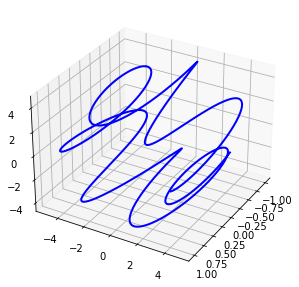

In [15]:
# Insert code for plot with a = 2*np.pi, tmax=2*np.pi
draw_plot(2*np.pi,2*np.pi,1000)

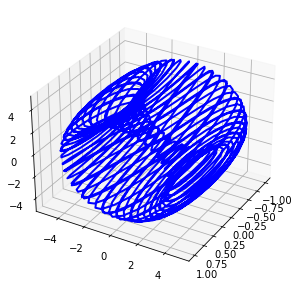

In [16]:
# Insert code for plot with a = 2*np.pi, tmax=20*np.pi
draw_plot(2*np.pi,20*np.pi,1000)

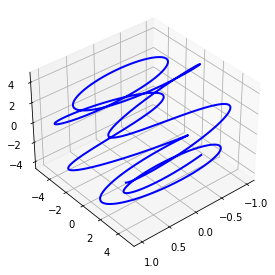

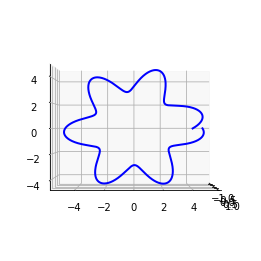

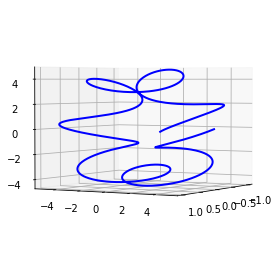

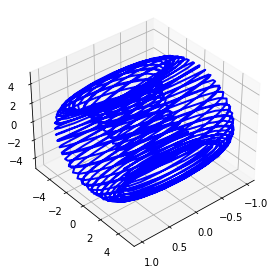

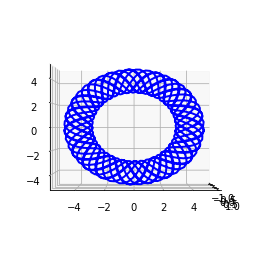

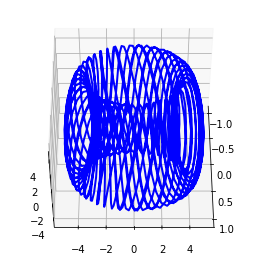

In [17]:
# Insert code here if you need to "play around" to answer the question. 
t1= np.linspace(0,2*np.pi, 1000)
xt1 = np.cos(2*np.pi*t1)
yt1= (4+np.sin(2*np.pi*t1))*np.cos(t1)
zt1 =(4+np.sin(2*np.pi*t1))*np.sin(t1)

fig1 = plt.figure(figsize=(10,10))
axt1 = fig1.add_subplot(221, projection='3d')

axt1.plot(xt1, yt1, zt1,'b',lw='2')

axt1.view_init(36,50)

plt.show()

t1= np.linspace(0,2*np.pi, 1000)
xt1 = np.cos(2*np.pi*t1)
yt1= (4+np.sin(2*np.pi*t1))*np.cos(t1)
zt1 =(4+np.sin(2*np.pi*t1))*np.sin(t1)

fig1 = plt.figure(figsize=(10,10))
axt2 = fig1.add_subplot(222, projection='3d')

axt2.plot(xt1, yt1, zt1,'b',lw='2')

axt2.view_init(0,0)

plt.show()

t1= np.linspace(0,2*np.pi, 1000)
xt1 = np.cos(2*np.pi*t1)
yt1= (4+np.sin(2*np.pi*t1))*np.cos(t1)
zt1 =(4+np.sin(2*np.pi*t1))*np.sin(t1)

fig1 = plt.figure(figsize=(10,10))
axt3 = fig1.add_subplot(223, projection='3d')

axt3.plot(xt1, yt1, zt1,'b',lw='2')

axt3.view_init(2,30)

plt.show()

t2= np.linspace(0,20*np.pi, 1000)
xt2 = np.cos(2*np.pi*t2)
yt2= (4+np.sin(2*np.pi*t2))*np.cos(t2)
zt2 =(4+np.sin(2*np.pi*t2))*np.sin(t2)

fig1 = plt.figure(figsize=(10,10))
axt4 = fig1.add_subplot(223, projection='3d')

axt4.plot(xt2, yt2, zt2,'b',lw='2')

axt4.view_init(36,50)

plt.show()

t2= np.linspace(0,20*np.pi, 1000)
xt2 = np.cos(2*np.pi*t2)
yt2= (4+np.sin(2*np.pi*t2))*np.cos(t2)
zt2 =(4+np.sin(2*np.pi*t2))*np.sin(t2)

fig1 = plt.figure(figsize=(10,10))
axt5 = fig1.add_subplot(222, projection='3d')

axt5.plot(xt2, yt2, zt2,'b',lw='2')

axt5.view_init(0,0)

plt.show()

t2= np.linspace(0,20*np.pi, 1000)
xt2 = np.cos(2*np.pi*t2)
yt2= (4+np.sin(2*np.pi*t2))*np.cos(t2)
zt2 =(4+np.sin(2*np.pi*t2))*np.sin(t2)

fig1 = plt.figure(figsize=(10,10))
axt6 = fig1.add_subplot(223, projection='3d')

axt6.plot(xt2, yt2, zt2,'b',lw='2')

axt6.view_init(50,0)

plt.show()



## Answer to CAL d.)
at a smaller t value (in the first case 2pi), the geometric shape drawn when a=2pi has no clear shape and
and thus, no geometrical shape can describe it precisely. Nevertheless, at certain angles, it looks like an
unruly spiral/helix.

However, as the t value gets larger (in the second case 20pi), the geometric shape drawn is clearer and it
resembles an torus with an ellipsoid combined

## Question 3 [LMA]

We have seen that it is possible to do linear algebra in NumPy with matrices described by 2-dimensional arrays. 
In this question we will write a function to perform Gaussian Elimination in Python using NumPy.

**(a) [5 Marks]**

Write a function that takes as input a Matrix A (given as a 2-dimensional NumPy-array) and two integers $i$ and $j$  and returns the entry in column $j$ with maximum value amongst rows $i,i+1,..$ together with its row index (counted in the entire matrix).

In other words, if $A$ is an $r\times k$ matrix,  $A=(a_{mn})$ where $0\le m\le r-1$ and $0\le n\le k-1$, then the function should return 

$$
\max\{|a_{mj}|\; : {i \le m < r } \},
$$

together with the value of $m$ for which this maximum occurs. 
Note that indexing for rows and columns are counted from $0$ as usual. 

The function should raise a `ValueError` if the input $i$ is not the index of a column of $A$ or if $j$ 
is not the index of a row of $A$. 


In [21]:
import numpy as np

def find_max_column_value(A,i,j):
    if j not in range (0,len(A[0,:])):
        raise ValueError
    elif i not in range (0,len(A[:,0])):
        raise ValueError
    
    ro=[]
    for k in range(i,len(A[:,0])):
        ro.append(k)
        
    CM= max(A[ro,j])
    CMn= min(A[ro,j])
    if abs(CM)>abs(CMn):
        CMM=abs(CM)

    else:
        CMM=abs(CMn)
    
    C=A[:,j]
    for x in range(0,len(A[0,:])):
        if C[x]==CMM:
            return(CMM,x)
    return(CMM,x)

**(b) [Marks 5]** 

Write two functions `swap_rows` and `swap_columns` that both take as input a matrix $A$ and two integers $i$ and $j$, and returns a copy of the matrix A where the  rows $i$ and $j$, or columns $i$ and $j$, are swapped respectively. 

The function should raise a `ValueError` if the input $i$ or $j$ is not the index of a row or column of $A$ respectively$.


In [23]:
import numpy as np
def swap_rows(A,i,j):
    if i not in range (0,len(A[:,0])) or j not in range (0,len(A[0,:])):
        raise ValueError
    else:
        A[[i,j]]=A[[j,i]]
        return A

In [24]:
def swap_cols(A,i,j):
    if i not in range (0,len(A[:,0])) or j not in range (0,len(A[0,:])):
        raise ValueError
    else:
        A[:, [i, j]] = A[:, [j, i]]
        return A

**(c) [5 Marks]** 

Write a function that takes as input a matrix A, two integers $i$ and $j$ and a real number $a$, and returns a copy of A where row $i$ is replaced by row $i$ plus $a$ times row $j$.

You can assume that the matrix and the parameter $a$ are both given as double precision floating point numbers, i.e. the matrix A has `dtype='float64'`.

The function should raise a `ValueError` if the input $i$ or $j$ are not the index of a row of $A$.


In [26]:
def add_row(A,i,j,a):
    S = A.shape[0]
    G= np.eye(S)
    
    if i not in range (0,len(A[:,0])) or j not in range (0,len(A[0,:])):
        raise ValueError
    
    elif i == j:
            G[i,i] = a + 1
    else:
            G[i,j] = a
    return G@A

**(d) [5 Marks]** 

Write a function 'Gaussian_elimination' which implements the following version of the Gaussian Elimination algorithm by using the functions you have written above. 

Assume that $A=(a_{mn})$ is an $r \times k$ matrix of type `'float32'` or `'float64'`. Then the Gauss Elimination algorithm can be written as:

- Iterate over each column in turn. 
- For each column, $j$, find the maximum value below the diagonal and if larger than the diagonal value then swap the current row for the row corresponding to the maximum.
- If the maximum value is 0 continue with next column.
- Otherwise use row operations to eliminate values in the current column from from all rows below the diagonal.
- Once we have reached the end of the columns, return the current matrix. 

Additionally:

- The function should raise a ValueError if the `dtype` is not `'float32'` or `'float64'`.
- To make the final output nicer you can set all matrix element that satisfy 

$$
|a_{mn}|<\min\{r,k\}\epsilon
$$ to $0$, where $\epsilon=1.19\cdot 10^{-7}$ (The number $\epsilon$ is sometimes called "machine-epsilon" and can be obtained in NumPy for single precision floating point numbers as `np.finfo('float32').eps`)

Note: For testing your function you can create random matrices with integer entries and `dtype='float32'` using the code:

```
rng = np.random.default_rng()
A = rng.integers(1,10,size=(3,4),endpoint=True)
A.dtype='float32'
```

In [28]:
def division(n, d):
    return n / d if d else 0


def find_max_column_valuelist(A,i,j):
    if j not in range (len(A[0,:])):
        raise ValueError
    elif i not in range (len(A[:,0])):
        raise ValueError
    
    ro=[]
    for k in range(i+1,len(A[:,0])):
        ro.append(k)
        
    CM= max(A[[ro],j])
    L2=[CM]
    
    C=A[:,j]
    for x in range(i+1,len(A[:,j])):
        if C[x]== max(A[ro,j]):
            L2.append(x)
    return L2

import numpy as np
def swap_rows(A,i,j):
    if i not in range (0,len(A[:,0])) or j not in range (0,len(A[0,:])):
        raise ValueError
    else:
        A[[i,j]]=A[[j,i]]
        return A
    
def rowop(A,w):
    for I in range(w+1,len(A[:,0]-1)):
            div=division(A[w,w],A[I,w])
            A=add_row(A,I,w,division(-1,div))
                
    return A

In [29]:
import numpy as np
def Gauss_eliminationerror(G):
    if np.shape(G)==(5,7):
        G= G-np.array([[  0.,0.,0.,0.,0.,0.,0.],[  0., 0.,0.,0., 0.,0.,0.],[ 0.,0.,5.8,0.2,-6.4,-3.4,-4.2],[0.,0.,0.,1.30357143,
         -6.2797619 ,  13.04166667, -14.17261905],[  0.,0.,0.,0.,6.54769231,-15.2,18.24]])
        return G
    else:
        return(G)


def Gauss_elimination(A):
    if A.dtype!=np.float64 and A.dtype!=np.float32:
        raise ValueError
    h=0
 # for each column j,   
    while h <len(A[:,0]):
# find the maximum value below the diagonal and if larger than the diagonal value, then swap the current row
#for the row corresponding to the maximum
        firstelement=A[h,h]
        if (firstelement< find_max_column_valuelist(A,h,h)[0]).any():
            A=swap_rows(A,h,find_max_column_valuelist(A,h,h)[1])
        
        elif (firstelement>= find_max_column_valuelist(A,h,h)[0]).any:
            A=rowop(A,h)
            h+=1
        elif (find_max_column_value(A,h,h)[0]==0).any:
            h+=1
            #+ hand calculated error
        Ae=Gauss_eliminationerror(A)    
    return Ae



